<a href="https://colab.research.google.com/github/chloepark627/tensorflow_ex/blob/master/ch06_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)


In [0]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [7]:
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


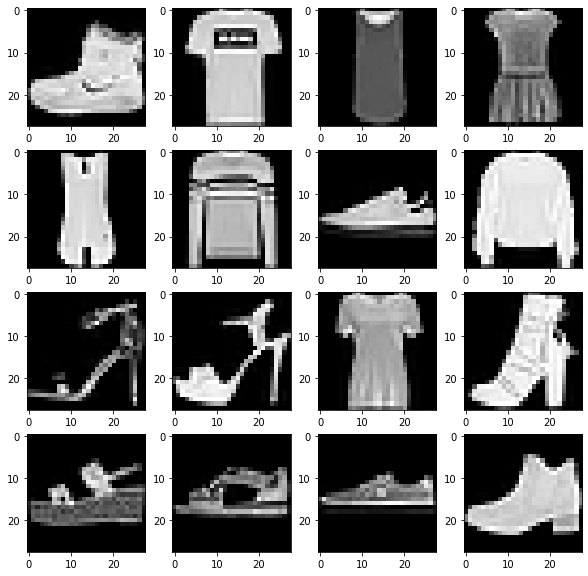

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    
plt.show()

In [9]:
train_Y[:16]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9], dtype=uint8)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

In [1]:
!nvidia-smi

Sun Apr 12 01:05:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [12]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4666 - accuracy: 0.8320 - val_loss: 0.3721 - val_accuracy: 0.8642
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3361 - accuracy: 0.8782 - val_loss: 0.3751 - val_accuracy: 0.8623
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2869 - accuracy: 0.8939 - val_loss: 0.3611 - val_accuracy: 0.8703
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2440 - accuracy: 0.9093 - val_loss: 0.3959 - val_accuracy: 0.8687
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2081 - accuracy: 0.9228 - val_loss: 0.4372 - val_accuracy: 0.8687
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1820 - accuracy: 0.9329 - val_loss: 0.4834 - val_accuracy: 0.8637
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1633 - accuracy: 0.9405 - val_loss: 0.5240 - val_accuracy:

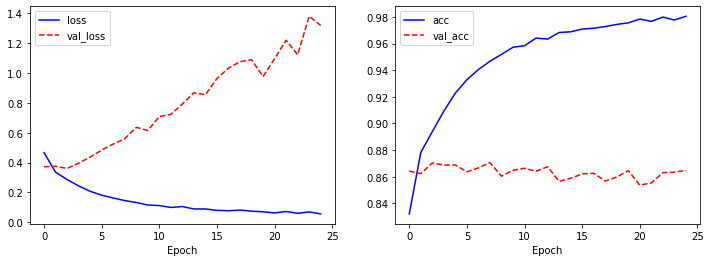

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [15]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 1.3800 - accuracy: 0.8599


[1.380013346672058, 0.8598999977111816]

In [0]:
# 과적합 방지 : 풀링레이어/ 드롭아웃레이어 추가

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    
])
